In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random

In [3]:
df = pd.read_csv('initial_data.csv',delimiter=';')
df.describe()
df

/var/folders/jq/m8zh0g_n3r7bkbp21v70h88m0000gq/T/ipykernel_43003/2590400308.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('initial_data.csv',delimiter=';')


,ID аккаунта,Фактическое время платежа,Время платежа,Сумма,Сумма в валюте,Валюта,Метод платежа,Unnamed: 7
0,1217,Tue Jul 25 19:40:34 AMT 2017,Tue Jul 25 19:41:49 AMT 2017,9.000000e+03,9.000000e+03,AMD,Оплата наличными,NaN
1,365,Tue Jul 25 17:35:23 AMT 2017,Tue Jul 25 17:35:23 AMT 2017,1.200000e+04,1.200000e+04,AMD,Оплата наличными,NaN
2,925,Tue Jul 25 17:35:08 AMT 2017,Tue Jul 25 17:35:08 AMT 2017,6.000000e+03,6.000000e+03,AMD,Оплата наличными,NaN
3,529,Tue Jul 25 17:34:57 AMT 2017,Tue Jul 25 17:34:57 AMT 2017,6.000000e+03,6.000000e+03,AMD,Оплата наличными,NaN
4,156,Tue Jul 25 17:34:40 AMT 2017,Tue Jul 25 17:34:40 AMT 2017,6.000000e+03,6.000000e+03,AMD,Оплата наличными,NaN
...,...,...,...,...,...,...,...,...
152310,Суммарно,NaN,NaN,1.799306e+08,1.799306e+08,NaN,The 'TelCell' payment system (6553886),NaN
152311,Суммарно,NaN,NaN,6.114350e+05,6.114350e+05,AMD,The 'TelCell' payment system (6553886),NaN
152312,Суммарно,NaN,NaN,-8.690000e+04,-8.690000e+04,NaN,Откат платежа,NaN
152313,Суммарно,NaN,NaN,4.780015e+05,4.780015e+05,AMD,Оплата через карту,NaN


### As we can see the data is in Russian, moreover, the last 5 rows are not data points, because they represent the sums of the data.

### So we must get rid of those 5 rows.

### Additionally, we don't need these columns: <br/>
### "Unnamed: 7",  <br/>
### "Валюта", because all values are in AMD, <br/>
### "Сумма в валюте", because it is the same as "Сумма"<br/>
### "Фактическое время платежа", because we already have and focus on "Время платежа"


In [4]:
df = df.iloc[:-13, :-1]
df = df.drop(df.columns[1], axis=1)
df = df.drop(df.columns[3], axis=1)
df = df.drop(df.columns[3], axis=1)
df

,ID аккаунта,Время платежа,Сумма,Метод платежа
0,1217,Tue Jul 25 19:41:49 AMT 2017,9000.0,Оплата наличными
1,365,Tue Jul 25 17:35:23 AMT 2017,12000.0,Оплата наличными
2,925,Tue Jul 25 17:35:08 AMT 2017,6000.0,Оплата наличными
3,529,Tue Jul 25 17:34:57 AMT 2017,6000.0,Оплата наличными
4,156,Tue Jul 25 17:34:40 AMT 2017,6000.0,Оплата наличными
...,...,...,...,...
152297,1031,Thu Sep 21 10:54:00 AMT 2023,900.0,"The ""TelCell"" payment system MIOM version (101)"
152298,2157,Thu Sep 21 10:41:40 AMT 2023,1000.0,"The ""Easypay"" payment system (100)"
152299,2135,Thu Sep 21 10:39:03 AMT 2023,4000.0,"The ""Easypay"" payment system (100)"
152300,1928,Thu Sep 21 10:37:22 AMT 2023,6000.0,"The ""TelCell"" payment system MIOM version (101)"


### In the above dataframe, we can see all the modified results, which were described initally. <br/>
### Now, we should format the string to datetime for "Время платежа" column and rename it to "payment_date" <br/>
### Moreover, we should also rename the rest of the columns into English. So, the appropriate English names are ["account_id","payment_amount", "payment_method","payment_date"]

In [5]:
datetime_format = "%a %b %d %H:%M:%S AMT %Y"
df["payment_date"] = pd.to_datetime(df['Время платежа'], format=datetime_format)
df = df.drop(df.columns[1], axis=1)
df.columns = ["account_id","payment_amount", "payment_method","payment_date"]
df.head()

,account_id,payment_amount,payment_method,payment_date
0,1217,9000.0,Оплата наличными,2017-07-25 19:41:49
1,365,12000.0,Оплата наличными,2017-07-25 17:35:23
2,925,6000.0,Оплата наличными,2017-07-25 17:35:08
3,529,6000.0,Оплата наличными,2017-07-25 17:34:57
4,156,6000.0,Оплата наличными,2017-07-25 17:34:40


In [6]:
# Now let's get rid of credits and refunds in the coulumn called "payment_method"
df = df[~df['payment_method'].isin(['Кредит',"(-1)","(0)"])]

translation_dict = {
    'Оплата наличными': 'Cash Payment',
    'Банковский перевод': 'Bank Transfer',
    'Откат платежа': 'Payment Refund',
    'Оплата через карту': 'Card Payment',
    "The 'TelCell' payment system (6553886)": 'TelCell',
    'The "TelCell" payment system MIOM version (101)': 'TelCell',
    'The "Easypay" payment system (100)': 'Easypay'
}

# Use the replace function to translate the values
df['payment_method'] = df['payment_method'].replace(translation_dict)
(-df[df['payment_method'] == 'Payment Refund']['payment_amount']).any()
df = df[df['payment_method'] != 'Payment Refund']

In [7]:
# Convert datetime into date
df['payment_date'] = pd.to_datetime(df['payment_date'].dt.date)

### As we do not have real gender and age components of the customers, we decided to generate those values

In [8]:
random.seed(0)
unique_account_ids = df['account_id'].unique()

# Generate random gender and age for each unique account_id
gender_map = {account_id: random.choice(['male', 'female']) for account_id in unique_account_ids}
age_map = {account_id: random.randint(20, 70) for account_id in unique_account_ids}
age_group_map = {account_id: random.choice(["Under 30","30-40","40-60","60+"]) for account_id in unique_account_ids}

# Map these values to the dataframe
df['gender'] = df['account_id'].map(gender_map)
df['age'] = df['account_id'].map(age_map)
df['age_group'] = df['account_id'].map(age_group_map)
df.head()

,account_id,payment_amount,payment_method,payment_date,gender,age,age_group
0,1217,9000.0,Cash Payment,2017-07-25,female,57,30-40
1,365,12000.0,Cash Payment,2017-07-25,female,29,40-60
2,925,6000.0,Cash Payment,2017-07-25,male,25,30-40
3,529,6000.0,Cash Payment,2017-07-25,female,28,Under 30
4,156,6000.0,Cash Payment,2017-07-25,female,29,30-40


In [9]:
village = pd.read_csv('village.csv')
village.columns = ['account_id',"village"]
df = pd.merge(right = village, left = df, left_on='account_id',right_on = 'account_id')


In [10]:
#df.to_csv("prepared_data.csv",index=False)

## Exploratory analysis with visualizations

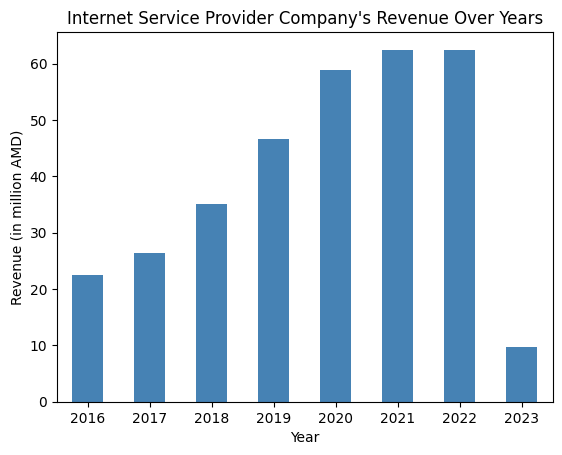

In [11]:
df['year'] = df['payment_date'].dt.year
grouped = df.groupby('year')['payment_amount'].sum() / 1000000
ax = grouped.plot(kind='bar', color='steelblue', legend=False)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.title("Internet Service Provider Company's Revenue Over Years")
plt.xlabel("Year")
plt.xticks(rotation = 0)
plt.ylabel("Revenue (in million AMD)")
plt.savefig("revenue.png")

### To get started, we have plotted the company's yearly revenue to identify anomaly years during the time period. Since the data was gathered in 2023 October, the last year’s data is not available as of the time of the analysis. We can see dynamic patterns, when it goes up from 2016 up to 2021 and it goes down. We can identify growth and maturity stages from the plot and it is visually convincing that the company would likely experience stagnation or decline in the upcoming years under these circumstances.


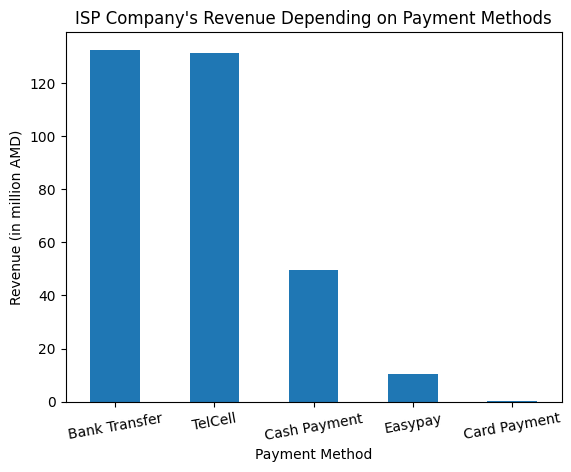

In [12]:
grouped2 = df.groupby('payment_method')['payment_amount'].sum() / 1000000
grouped2.sort_values(ascending = False).plot(kind='bar')
plt.xlabel("Payment Method")
plt.xticks(rotation = 10)
plt.ylabel("Revenue (in million AMD)")
plt.title("ISP Company's Revenue Depending on Payment Methods")
plt.savefig("paymentmethod.png")

### The bar chart reveals that over the past eight years, the 'Bank Transfer' and 'TelCell' payment methods have been the top revenue generators, performing equally well. 'Cash payment' ranks third in generating revenue. Notably, 'Easypay' brings in considerably less revenue, and 'card payment' is the least effective, ranking fifth. 
